### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import skew, kurtosis
from tabulate import tabulate  

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Reading the file

In [3]:
df = pd.read_csv('Orange Quality Data.csv')

### Data Cleaning

##### Displaying the first five rows of dataset

In [4]:
df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


##### Checking type of data and missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


##### Visualization for Null values

In [6]:
df.isna().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

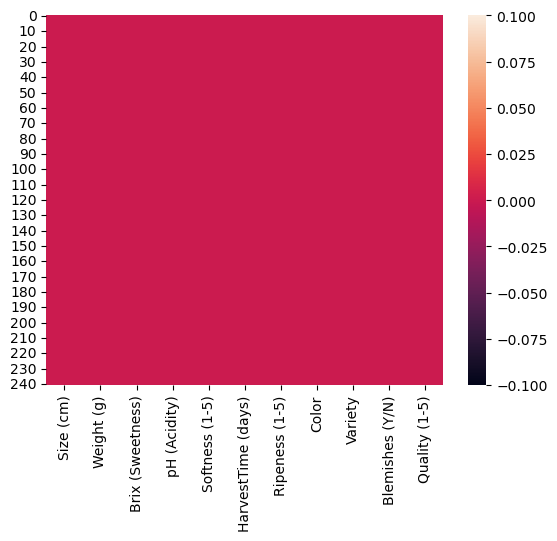

In [7]:
sns.heatmap(df.isnull());

- Our dataset is completely clean and doesn't contain any Null Values

##### Checking the number of rows and columns in the dataset

In [8]:
df.shape

(241, 11)

- The dataset has 241 rows and 11 columns

##### Renaming the columns for ease

In [9]:
# Original list of column names
original_columns = ['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
                    'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Color',
                    'Variety', 'Blemishes (Y/N)', 'Quality (1-5)']

# List to store cleaned column names
cleaned_columns = []

# Loop through each original column name
for column in original_columns:
    # Use split('(')[0].strip() to remove the content within brackets and any leading/trailing spaces
    cleaned_name = column.split('(')[0].strip()
    cleaned_columns.append(cleaned_name)

# Update the DataFrame columns with the cleaned column names
df.columns = cleaned_columns

In [10]:
df

,Size,Weight,Brix,pH,Softness,HarvestTime,Ripeness,Color,Variety,Blemishes,Quality
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [11]:
df.columns

Index(['Size', 'Weight', 'Brix', 'pH', 'Softness', 'HarvestTime', 'Ripeness',
       'Color', 'Variety', 'Blemishes', 'Quality'],
      dtype='object')

##### Encoding the 'object' type columns

In [12]:
blemish = df['Blemishes'].value_counts()
varr = df['Variety'].value_counts()
color = df['Color'].value_counts()

In [13]:
blemish

N                          149
Y (Sunburn Patch)           23
Y (Scars)                   17
Y (Minor)                   14
Y (Mold Spot)               10
Y (Bruising)                 9
Y (Split Skin)               8
Y (Minor Insect Damage)      6
Y (Sunburn)                  2
Y (Bruise)                   1
N (Minor)                    1
N (Split Skin)               1
Name: Blemishes, dtype: int64

In [14]:
varr

Cara Cara                21
Temple                   18
Star Ruby                18
Navel                    16
Moro (Blood)             16
Tangerine                14
Clementine               14
Washington Navel         14
Satsuma Mandarin         13
Ortanique (Hybrid)       13
Minneola (Hybrid)        12
Jaffa                    11
Ambiance                 11
Valencia                 11
California Valencia       7
Honey Tangerine           7
Hamlin                    5
Midsweet (Hybrid)         5
Clementine (Seedless)     4
Murcott (Hybrid)          3
Navel (Late Season)       3
Blood Orange              2
Navel (Early Season)      2
Tangelo (Hybrid)          1
Name: Variety, dtype: int64

In [15]:
color

Deep Orange      75
Light Orange     64
Orange-Red       55
Orange           38
Yellow-Orange     9
Name: Color, dtype: int64

In [16]:
#For Regression
df_reg = df.copy()
# Columns we want to encode

columns_to_encode_reg = ['Color','Variety' ,'Blemishes']  #omitting it here as we need the continuous values

# Applying label encoding to each column in the list

for column in columns_to_encode_reg:
    df_reg[column] = LabelEncoder().fit_transform(df_reg[column])
    
# Print the dataset to check the changes
df_reg

,Size,Weight,Brix,pH,Softness,HarvestTime,Ripeness,Color,Variety,Blemishes,Quality
0,7.5,180,12.0,3.2,2.0,10,4.0,2,22,0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,0,13,0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,1,3,0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,3,1,0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,2,6,6,4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,3,20,8,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,1,10,0,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,0,21,5,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,1,11,5,3.0


In [17]:
#For Classification
# Columns we want to encode

columns_to_encode = ['Color','Variety' ,'Blemishes', 'Quality']  #encoding quality as it contains float value and it is continuous

# Applying label encoding to each column in the list

for column in columns_to_encode:
    df[column] = LabelEncoder().fit_transform(df[column])
    
# Print the dataset to check the changes
df

,Size,Weight,Brix,pH,Softness,HarvestTime,Ripeness,Color,Variety,Blemishes,Quality
0,7.5,180,12.0,3.2,2.0,10,4.0,2,22,0,5
1,8.2,220,10.5,3.4,3.0,14,4.5,0,13,0,6
2,6.8,150,14.0,3.0,1.0,7,5.0,1,3,0,7
3,9.0,250,8.5,3.8,4.0,21,3.5,3,1,0,4
4,8.5,210,11.5,3.3,2.5,12,5.0,2,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,3,20,8,7
237,7.4,275,8.5,3.5,5.0,20,5.0,1,10,0,5
238,7.5,196,15.7,3.0,3.0,13,3.0,0,21,5,7
239,7.2,251,9.8,4.3,3.0,23,1.0,1,11,5,3


In [18]:
df_reg

,Size,Weight,Brix,pH,Softness,HarvestTime,Ripeness,Color,Variety,Blemishes,Quality
0,7.5,180,12.0,3.2,2.0,10,4.0,2,22,0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,0,13,0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,1,3,0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,3,1,0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,2,6,6,4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,3,20,8,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,1,10,0,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,0,21,5,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,1,11,5,3.0


##### Describing the data

In [19]:
df.describe(include='all')

,Size,Weight,Brix,pH,Softness,HarvestTime,Ripeness,Color,Variety,Blemishes,Quality
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,1.414938,12.340249,2.846473,4.672199
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.245837,7.176379,3.887651,1.931217
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,0.000000,6.000000,0.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,1.000000,13.000000,0.000000,5.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,3.000000,18.000000,6.000000,6.000000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,4.000000,23.000000,11.000000,7.000000


### Exploratory Data Analysis

##### Checking for duplicates and removing them

In [20]:
# checking if there are duplicated rows using the df.duplicated() function

df[df.duplicated(keep = 'first')]       # keep = 'first' does not mark the first occurrence as duplicate

,Size,Weight,Brix,pH,Softness,HarvestTime,Ripeness,Color,Variety,Blemishes,Quality


There are no duplicate columns.

##### Relationship/Correlation of columns with each other

In [21]:
def plot_correlation_heatmap(df, save_path=None, dpi=300):
    """
    Plot a correlation heatmap for the given DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame containing numeric columns.
        save_path (str, optional): File path to save the heatmap image.
        dpi (int, optional): Dots per inch for saving the image (default: 300).

    Returns:
        None
    """
    # Calculate correlation matrix
    corr = df.corr()

    # Create a mask to display only the lower triangle of the matrix
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 8))

    # Plot heatmap
    sns.heatmap(corr, annot=True, fmt='.2f', mask=mask)

    # Add title
    plt.title('Correlation Heatmap')

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=dpi)
        print(f"Correlation heatmap saved as {save_path}")

    # Show plot
    plt.show()

Correlation heatmap saved as o1.png


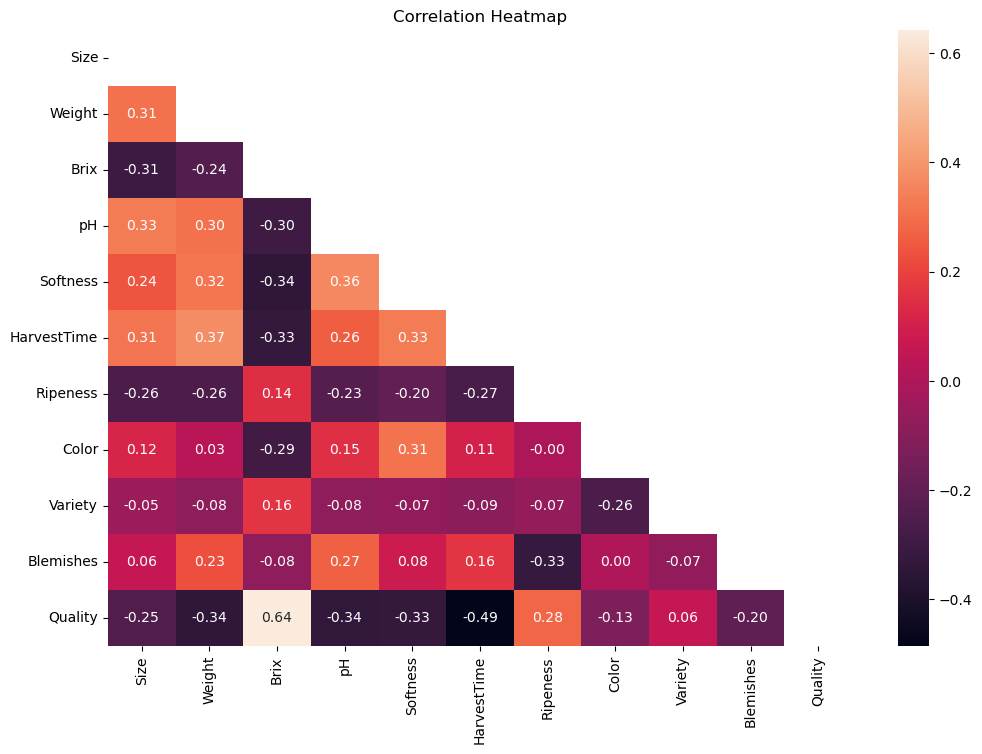

In [22]:
plot_correlation_heatmap(df, save_path='o1.png', dpi=300)

The **correlation coefficient** is a number between -1 and 1 that indicates how strong and in what direction the relationship is between two variables.

- A correlation coefficient of 1 indicates a perfect positive correlation meaning that as the value of one variable increases, the value of the other variable also increases.
- A correlation coefficient of -1 indicates a perfect negative correlation, meaning that as the value of one variable increases, the value of the other variable decreases.
- A correlation coefficient of 0 indicates no correlation between the two variables.

Here:
- ‘Quality’ and ‘Brix’ (0.64), ‘HarvestTime’ and ‘Weight’ (0.37), ‘pH’ and ‘Softness’ (0.36) and similarly all those which are greater than 0 are indicating moderate positive correlation, which means that one increases as the other increases.
- ‘HarvestTime’ and ‘Quality’ (-0.49), ‘Brix’ and ‘Softness’ (-0.34), ‘HarvestTime’ and ‘Brix’ (-0.33) and similarly all those which are lesser than 0 are indicating moderate negative correlation, which means that one increases as the other decreases.
- Other variables exhibit either weak positive correlation, weak negative correlation, or no correlation (close to 0).

*It is important to note that correlation does not imply causation. Just because two variables are correlated does not mean that one variable causes the other.*

##### Boxplots

In [23]:
def plot_boxplots(df, columns, save_path=None, dpi=300):
    """
    Plot boxplots for specified columns in the DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame.
        columns (list): List of column names for which boxplots will be plotted.
        save_path (str, optional): File path to save the boxplot image.
        dpi (int, optional): Dots per inch for saving the image (default: 300).

    Returns:
        None
    """
    # Create a figure and axes for the boxplot
    num_columns = len(columns)
    rows = (num_columns + 1) // 2  # Calculate number of rows needed based on columns
    plt.figure(figsize=(18, 5 * rows))  # Adjust figure size based on the number of columns

    # Loop through each column and create a boxplot
    for i, column in enumerate(columns):
        plt.subplot(rows, 2, i + 1)  # Create subplots dynamically based on number of columns
        sns.boxplot(x=df[column], color='thistle')  # Create boxplot with specified color
        plt.title(f'Box plot of {column}', fontsize=18, fontweight='bold')  # Set title
        plt.xlabel(column, fontsize=14, fontweight='bold')  # Set x-axis label
        plt.ylabel('Value', fontsize=14, fontweight='bold')  # Set y-axis label

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=dpi)
        print(f"Boxplot saved as {save_path}")

    # Display the boxplot
    plt.show()

Boxplot saved as o9.png


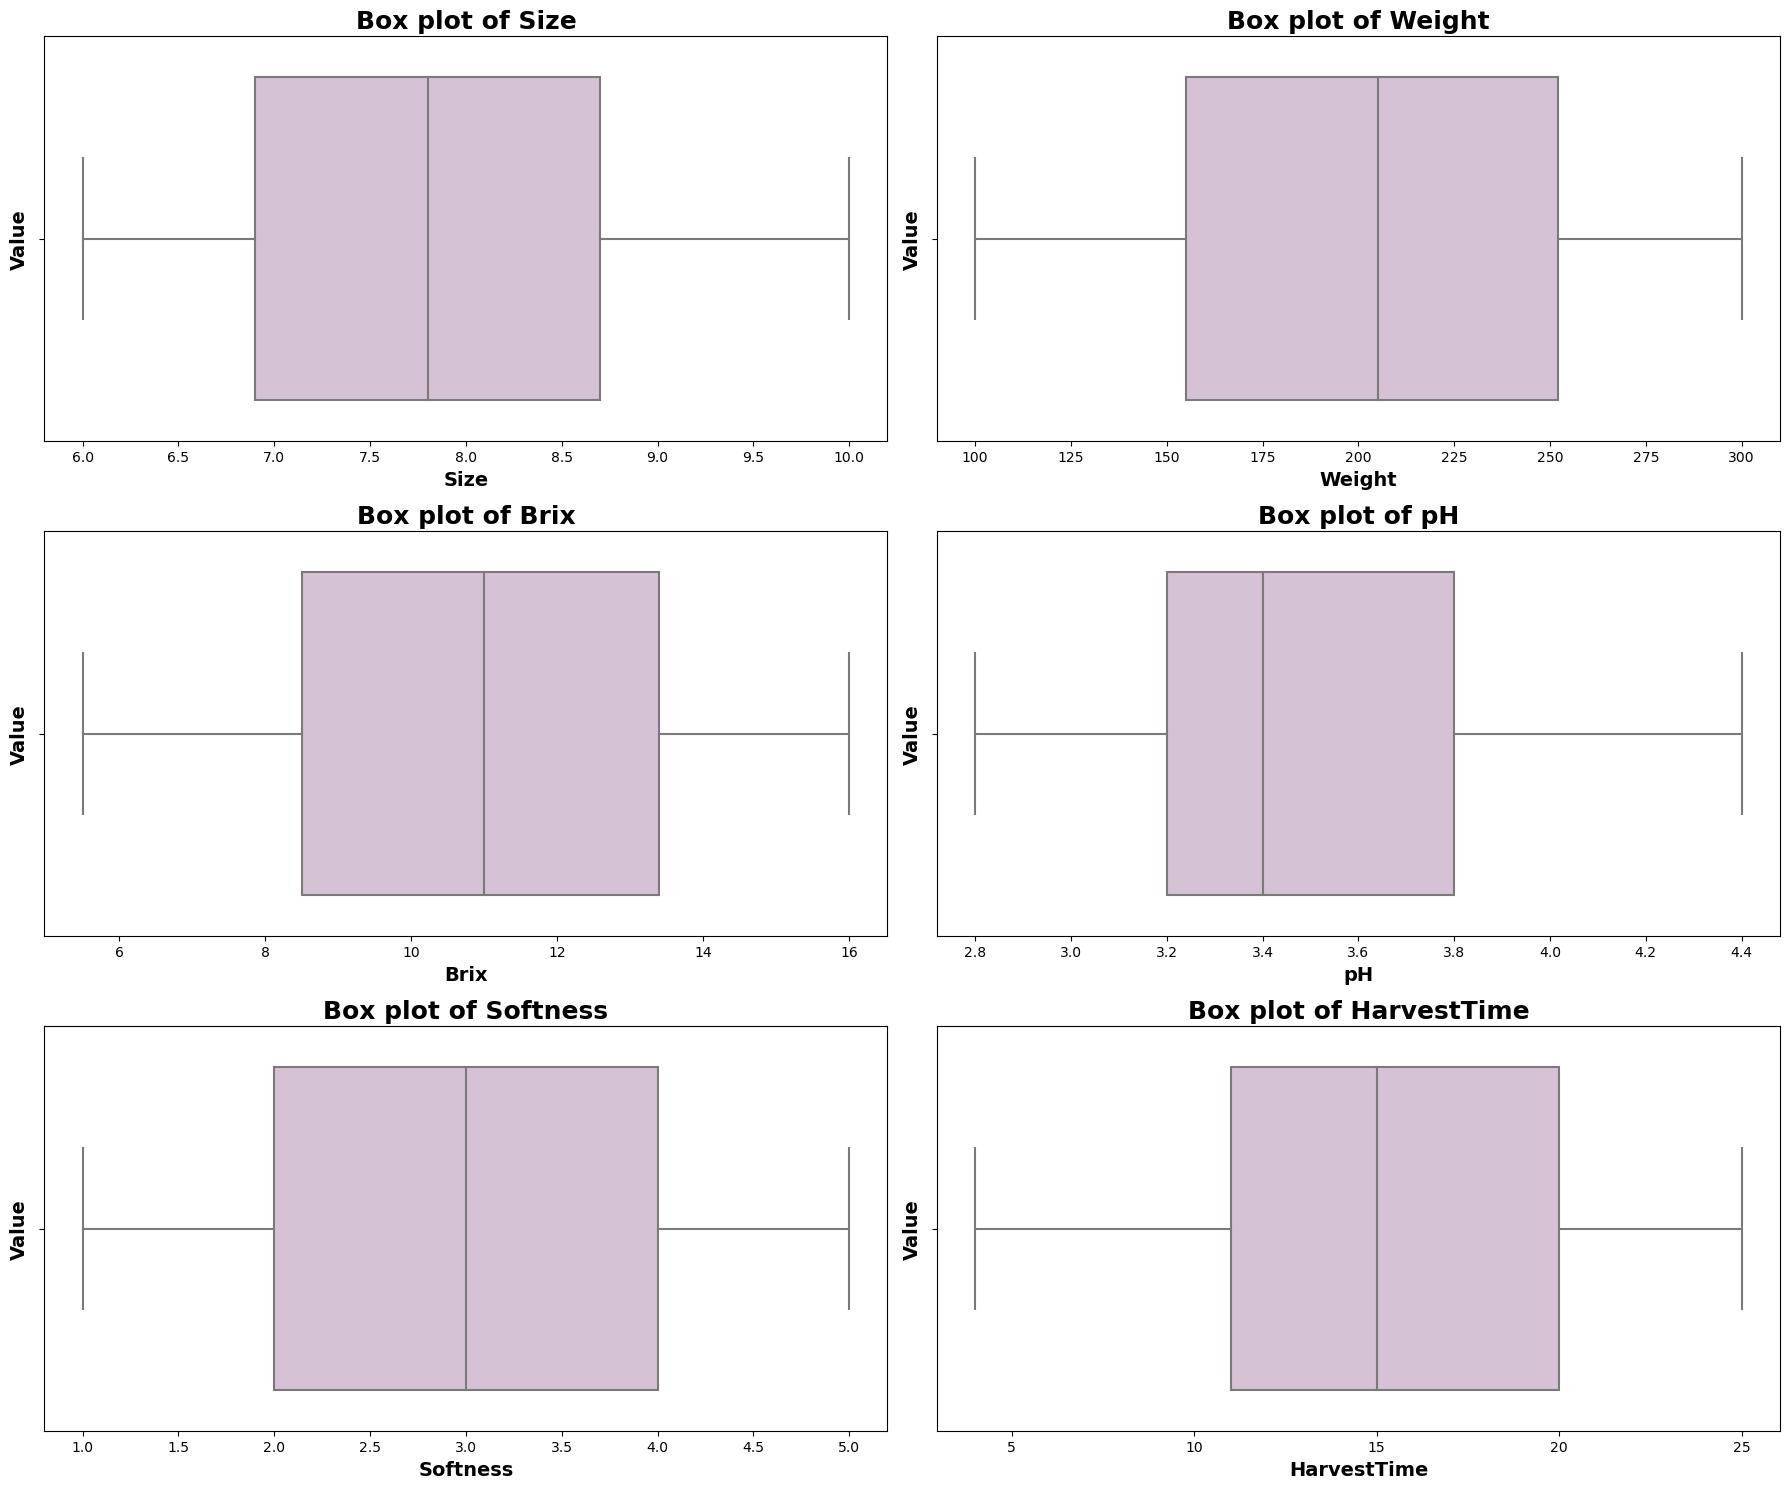

In [24]:
features=['Size', 'Weight', 'Brix', 'pH', 'Softness', 'HarvestTime']
plot_boxplots(df, features, save_path='o9.png', dpi=300)

##### Major Moments

In [25]:
# Calculate statistics
mean_values = df.mean()
median_values = df.median()
std_dev_values = df.std()
skewness_values = df.apply(lambda x: skew(x))
kurtosis_values = df.apply(lambda x: kurtosis(x))

# Create a DataFrame to display all statistics
stats_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Std Dev': std_dev_values,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values
})

# Print the statistics DataFrame using tabulate for a nicely formatted table
print("Major Moments:")
print(tabulate(stats_df, headers='keys', tablefmt='psql'))  # 'psql' table format


Major Moments:
+-------------+-----------+----------+-----------+------------+------------+
|             |      Mean |   Median |   Std Dev |   Skewness |   Kurtosis |
|-------------+-----------+----------+-----------+------------+------------|
| Size        |   7.84481 |      7.8 |  1.086    |  0.153599  |  -1.00371  |
| Weight      | 205.129   |    205   | 56.461    | -0.0486368 |  -1.1832   |
| Brix        |  10.9079  |     11   |  2.76045  | -0.0338547 |  -1.14773  |
| pH          |   3.4739  |      3.4 |  0.421007 |  0.37691   |  -0.77968  |
| Softness    |   3.07261 |      3   |  1.32363  | -0.0667361 |  -1.16166  |
| HarvestTime |  15.3444  |     15   |  5.32385  | -0.0402068 |  -0.911078 |
| Ripeness    |   3.59959 |      4   |  1.20521  | -0.590629  |  -0.605691 |
| Color       |   1.41494 |      1   |  1.24584  |  0.356458  |  -1.16586  |
| Variety     |  12.3402  |     13   |  7.17638  | -0.127954  |  -1.29454  |
| Blemishes   |   2.84647 |      0   |  3.88765  |  0.815816 

**Skewness** is described as the asymmetry measure of the data distribution, whereas **Kurtosis** is described as tailedness or peakedness measure of the data distribution. The following code determines the skewness and kurtosis values of all the columns present in the dataset:

**For Skewness:**
- Skewness approximately equal to 0, the distribution is symmetric.
- Skewness is greater than 0, the distribution is right skewed.
- Skewness is lesser than 0, the distribution is left skewed.
- The columns 'Weight', 'Brix', 'Softness', 'HarvestTime' are almost symmetric.
- The columns 'Size', 'pH', 'Color', 'Blemishes' are weakly right skewed.
- The columns  'Ripeness', 'Variety', 'Quality' are weakly left skewed.

**For Kurtosis:**
- Kurtosis lesser than 3 indicates lighter tails and a flatter peak (platykurtic).
- All the columns of this dataset are platykurtic.

##### Distribution/Bar Plots (Visualizing Skewness and Kurtosis)

In [26]:
def plot_distribution_plots(df, features, num_cols=3, plot_color='purple', save_path=None, dpi=300):
    """
    Plot distribution plots for specified features in the DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame.
        features (list): List of feature column names to plot.
        num_cols (int, optional): Number of plots to display per row (default: 3).
        plot_color (str, optional): Color for the distribution plots (default: 'purple').
        save_path (str, optional): File path to save the distribution plots image.
        dpi (int, optional): Dots per inch for saving the image (default: 300).

    Returns:
        None
    """
    num_features = len(features)
    num_rows = (num_features - 1) // num_cols + 1  # Calculate number of rows needed

    fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
    plt.subplots_adjust(wspace=0.2, hspace=0.7)

    for i in range(num_features):
        row = i // num_cols
        col = i % num_cols
        if i < num_features:
            sns.distplot(df[features[i]], fit=norm, ax=ax[row, col], color=plot_color)
            title = 'Distribution: ' + features[i]
            ax[row, col].set_title(title, fontsize=17, fontweight='bold')
            ax[row, col].xaxis.label.set_fontsize(14)
            ax[row, col].yaxis.label.set_fontsize(14)
            ax[row, col].xaxis.label.set_fontweight('bold')
            ax[row, col].yaxis.label.set_fontweight('bold')

            # Hide the y-axis label for all but the first column in each row
            if col != 0:
                ax[row, col].yaxis.set_visible(False)
        else:
            # If there are fewer features than subplots, remove the extra empty plots
            ax[row, col].axis('off')

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=dpi)
        print(f"Distribution plots saved as {save_path}")

    # Display the distribution plots
    plt.show()

Distribution plots saved as o3.png


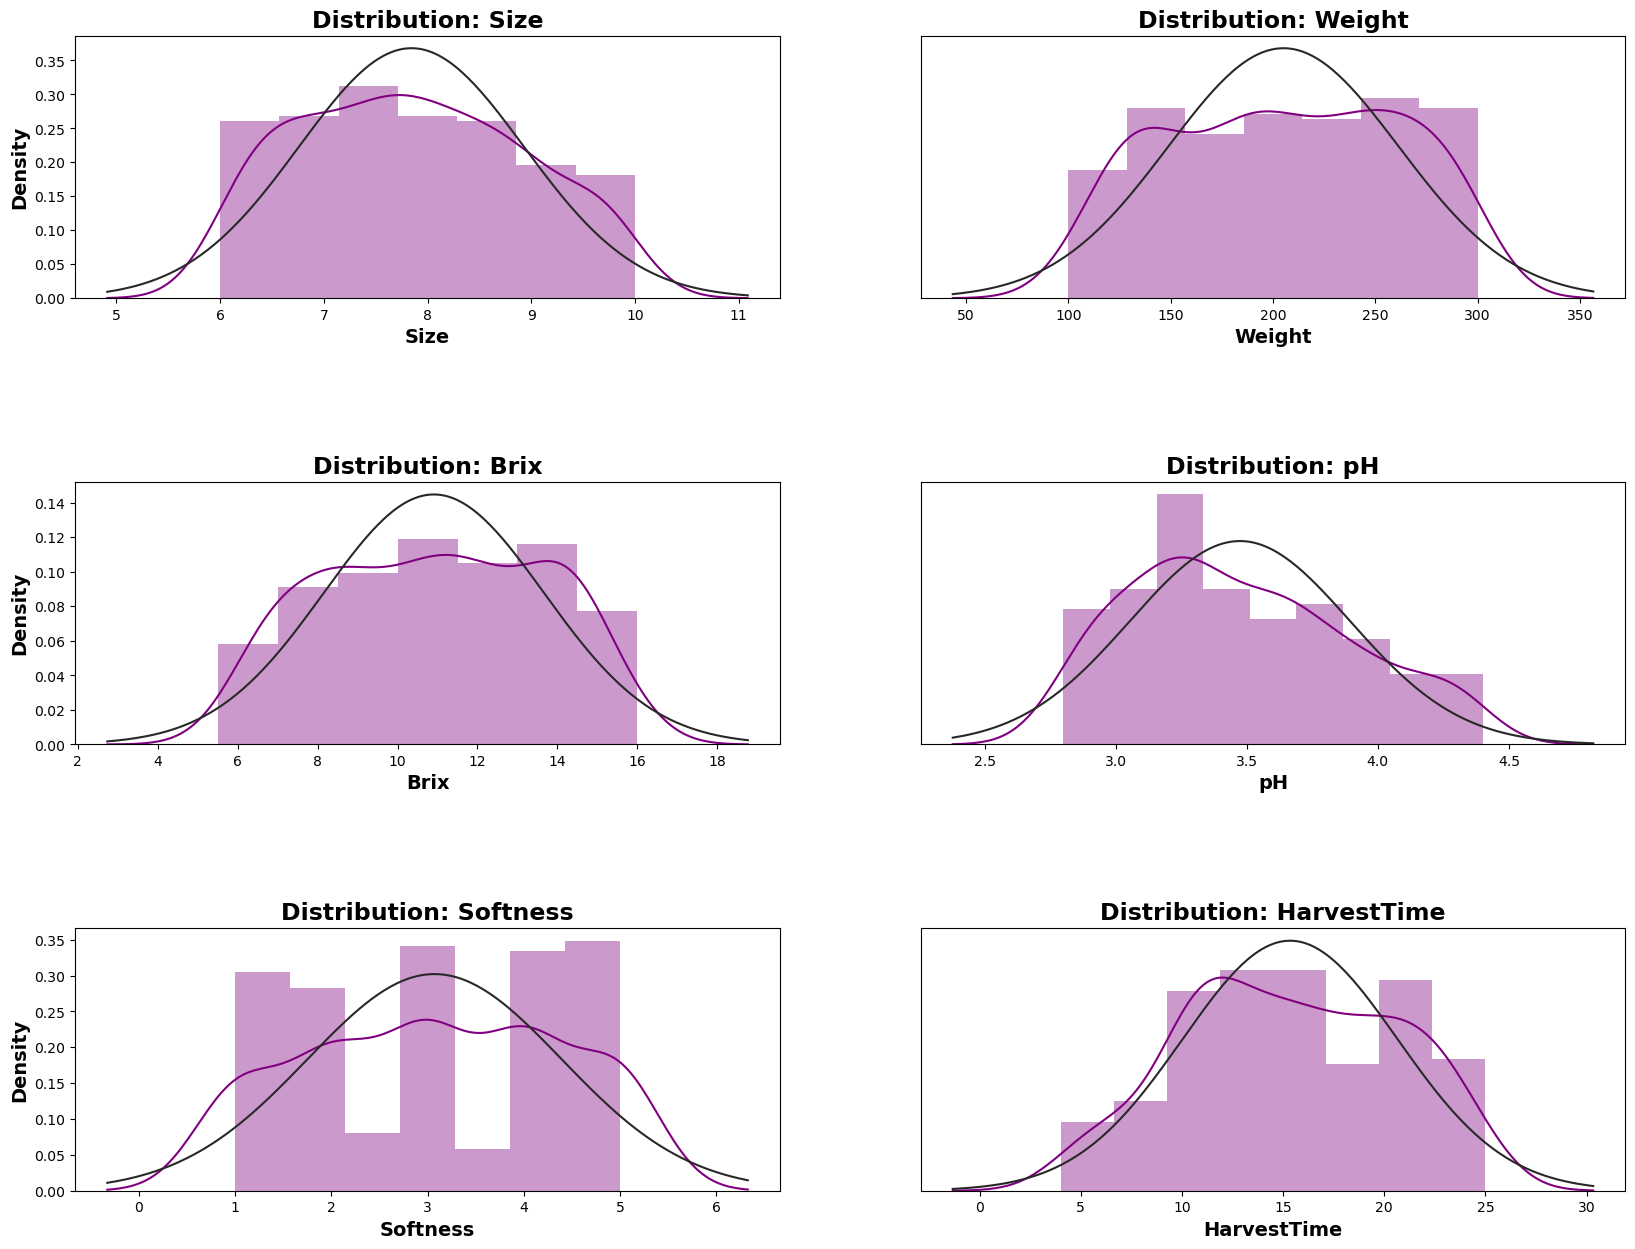

In [27]:
plot_distribution_plots(df, features, num_cols=2, plot_color='purple', save_path='o3.png', dpi=300)

##### Scatterplot

In [28]:
def plot_scatter_with_hue(df, x_col, y_col, hue_col, title=None, xlabel=None, ylabel=None, save_path=None, dpi=300):
    """
    Plot a scatter plot with hue based on a categorical variable.

    Parameters:
        df (DataFrame): Input DataFrame.
        x_col (str): Column name for the x-axis.
        y_col (str): Column name for the y-axis.
        hue_col (str): Column name for the hue (categorical variable).
        title (str, optional): Title of the plot (default: None).
        xlabel (str, optional): Label for the x-axis (default: None).
        ylabel (str, optional): Label for the y-axis (default: None).
        save_path (str, optional): File path to save the plot image.
        dpi (int, optional): Dots per inch for saving the image (default: 300).

    Returns:
        None
    """
    plt.figure(figsize=(6, 4))
    plt.title(title, fontsize=17, fontweight='bold') if title else None
    plt.ylabel(ylabel, fontsize=14, fontweight='bold') if ylabel else None
    plt.xlabel(xlabel, fontsize=14, fontweight='bold') if xlabel else None

    sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue_col)

    # Adjust layout
    plt.tight_layout()

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=dpi)
        print(f"Scatter plot saved as {save_path}")

    # Display the plot
    plt.show()

Scatter plot saved as o4.png


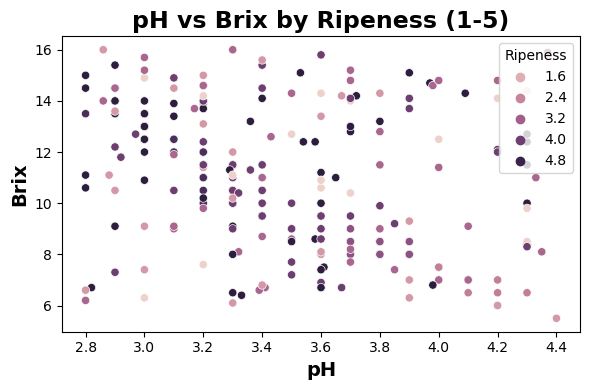

In [29]:
plot_scatter_with_hue(df, x_col='pH', y_col='Brix', hue_col='Ripeness',
                      title="pH vs Brix by Ripeness (1-5)",
                      xlabel='pH', ylabel='Brix',
                      save_path='o4.png', dpi=300)

##### Elbow Method for Optimal 'k'

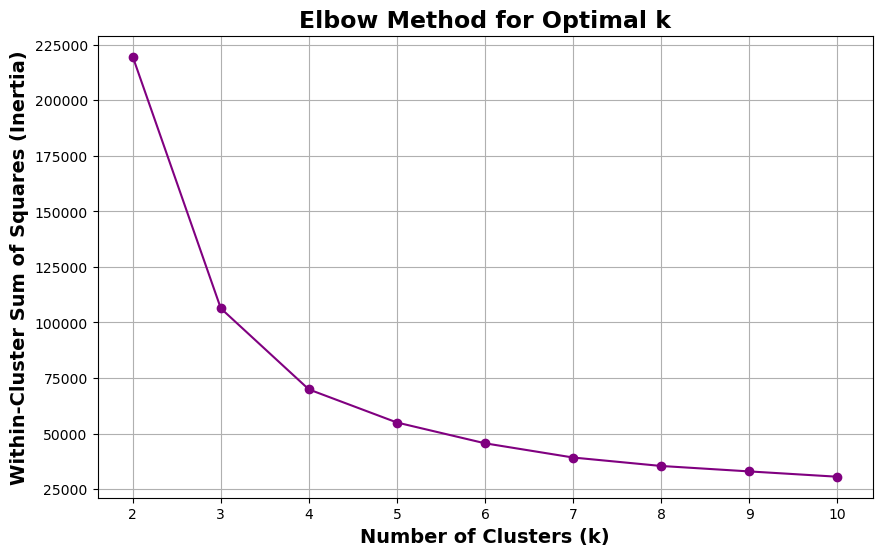

In [30]:
# Extract features for clustering (exclude the 'quality' column)
X = df.drop('Quality', axis=1)

# Initialize lists to store inertia values
inertia_values = []

# Test different values of k (number of clusters)
k_values = range(2, 11)  # Test k from 2 to 10

for k in k_values:
    # Create KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='purple')
plt.xlabel('Number of Clusters (k)', fontsize=14, fontweight='bold')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)', fontsize=14, fontweight='bold')
plt.title('Elbow Method for Optimal k', fontsize=17, fontweight='bold')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('o5.png', dpi=300)
plt.show()

### Model Creation and Evaluation

##### Clustering

In [31]:
def perform_kmeans_clustering(df, features, n_clusters=3, random_state=None):
    """
    Perform K-means clustering on specified features in the DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame containing the data.
        features (list): List of feature column names to use for clustering.
        n_clusters (int, optional): Number of clusters to form (default: 3).
        random_state (int, optional): Random seed for reproducibility (default: None).

    Returns:
        dict: A dictionary containing important variables from the K-means clustering:
            - 'cluster_labels': Series of cluster labels assigned to each data point.
            - 'cluster_centers': Array of cluster centers.
        km (Model): Trained K-Means model
    """
    # Initialize KMeans model
    km = KMeans(n_clusters=n_clusters, random_state=random_state)

    # Fit K-means and assign cluster labels
    df['cluster'] = km.fit_predict(df[features])

    # Get cluster labels and cluster centers
    cluster_labels = df['cluster']
    cluster_centers = km.cluster_centers_

    # Return important variables as a dictionary
    return {'cluster_labels': cluster_labels, 'cluster_centers': cluster_centers}, km

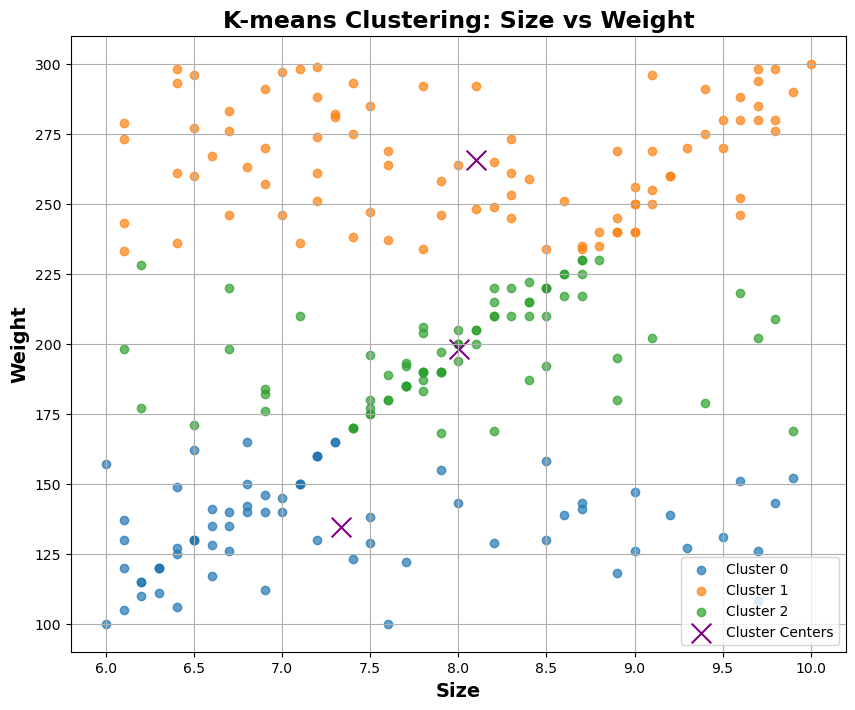

In [32]:
kmeans_data, km = perform_kmeans_clustering(df, features=['Size', 'Weight'], n_clusters=3, random_state=42)

#Plot clusters with cluster centers based on the returned data
plt.figure(figsize=(10, 8))
for cluster_label in sorted(kmeans_data['cluster_labels'].unique()):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['Size'], cluster_data['Weight'], label=f'Cluster {cluster_label}', alpha=0.7)

#Plot cluster centers
cluster_centers = kmeans_data['cluster_centers']
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='purple', label='Cluster Centers')

#Set plot title and labels
plt.title('K-means Clustering: Size vs Weight', fontsize=17, fontweight='bold')
plt.xlabel('Size', fontsize=14, fontweight='bold')
plt.ylabel('Weight', fontsize=14, fontweight='bold')

#Add legend and grid
plt.legend()
plt.grid(True)

#Save the plot if needed
plt.savefig('o6.png', dpi=300)
plt.show()

##### Checking the code if it predicts correctly

In [33]:
# Example new data point(s) for prediction
new_data = pd.DataFrame({'Size': [7.5, 6.0], 'Weight': [200, 150]})

# Use the trained K-means model to predict cluster labels for the new data
predicted_clusters = km.predict(new_data)

# Display the predicted cluster labels for the new data points
for i, cluster_label in enumerate(predicted_clusters):
    print(f"Predicted Cluster for New Data Point {i + 1}: {cluster_label}")

Predicted Cluster for New Data Point 1: 2
Predicted Cluster for New Data Point 2: 0


##### Visualizing the Predictions

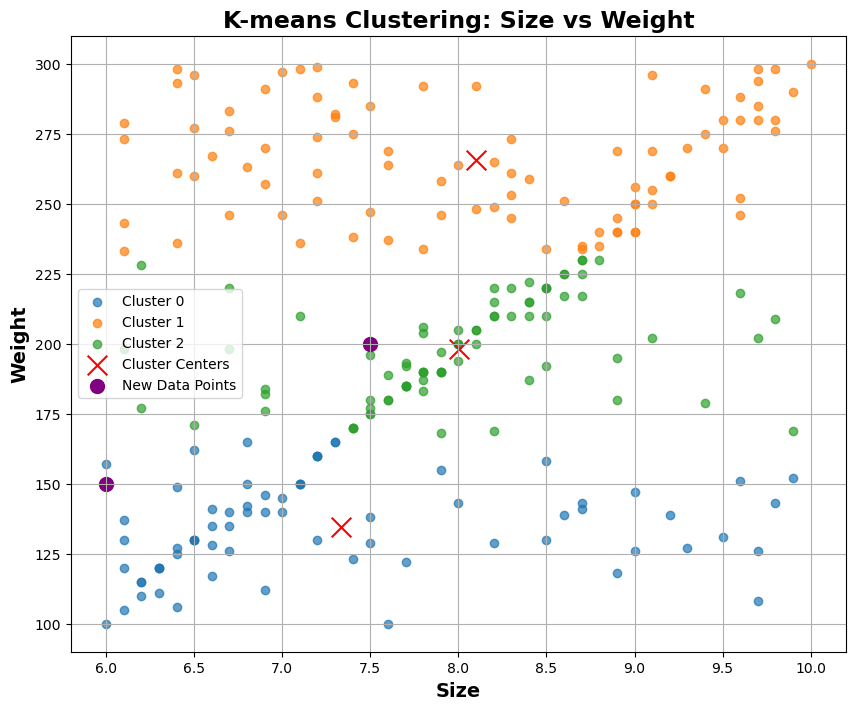

In [34]:
# Plot the new data points along with existing clusters and cluster centers
plt.figure(figsize=(10, 8))

# Plot each existing cluster using a different color
for cluster_label in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['Size'], cluster_data['Weight'], label=f'Cluster {cluster_label}', alpha=0.7)

# Plot cluster centers
cluster_centers = km.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='red', label='Cluster Centers')

# Plot the new data points with predicted cluster labels
plt.scatter(new_data['Size'], new_data['Weight'], marker='o', s=100, c='purple', label='New Data Points')

# Set plot title and labels
plt.title('K-means Clustering: Size vs Weight', fontsize=17, fontweight='bold')
plt.xlabel('Size', fontsize=14, fontweight='bold')
plt.ylabel('Weight', fontsize=14, fontweight='bold')

# Add legend
plt.legend()
plt.grid(True)
plt.savefig('o8.png', dpi=300)
plt.show()

##### Fitting

In [35]:
def perform_linear_regression(df, target_col, test_size=0.2, random_state=None):
    """
    Perform linear regression on the dataset and return important variables.

    Parameters:
        df (DataFrame): Input DataFrame containing the data.
        target_col (str): Name of the target variable column.
        test_size (float, optional): Proportion of the dataset to include in the test split (default: 0.2).
        random_state (int, optional): Random seed for reproducibility (default: None).

    Returns:
        dict: A dictionary containing important variables from the linear regression:
            - 'X_train': Training features.
            - 'X_test': Test features.
            - 'y_train': Training target variable.
            - 'y_test': Test target variable.
            - 'model': Trained LinearRegression model.
            - 'y_pred': Predicted values on the test set.
    """
    # Separate features (X) and target variable (y)
    X = df_reg.drop(target_col, axis=1) 
    y = df[target_col]

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize Linear Regression model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Return important variables as a dictionary
    return {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'model': model,
        'y_pred': y_pred
    }

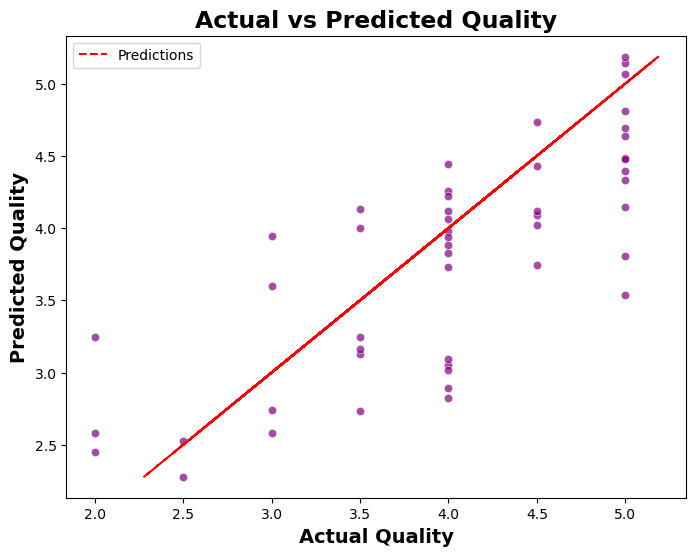

In [36]:
regression_data = perform_linear_regression(df_reg, target_col='Quality', test_size=0.2, random_state=42)

#Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=regression_data['y_test'], y=regression_data['y_pred'], color='purple', alpha=0.7)
plt.plot(regression_data['y_pred'], regression_data['y_pred'], color='red', linestyle='--', label='Predictions')  # Plot the diagonal line for perfect predictions
plt.title('Actual vs Predicted Quality', fontsize=17, fontweight='bold')
plt.xlabel('Actual Quality', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Quality', fontsize=14, fontweight='bold')
plt.legend()

#Save the plot if needed
plt.savefig('o7.png', dpi=300)
plt.show()

In [37]:
#Calculating the coefficients

coefficients = regression_data['model'].coef_
print(f'Coefficients {coefficients}')

#Calculating the intercept

intercept = regression_data['model'].intercept_
print(f'Intercept: {intercept}')

#Calculating R-Squared

from sklearn.metrics import r2_score
r2 = r2_score(regression_data['y_test'], regression_data['y_pred'])
print(f'R2: {r2}')

#Calculating Root Mean Squared Error

rmse = mean_squared_error(regression_data['y_test'], regression_data['y_pred'], squared=False)
print(f'RMSE: {rmse}')

#Calculating Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(regression_data['y_test'], regression_data['y_pred'])
print(f'MAE {mae}')

#Calculating Mean Squared Error
mse = mean_squared_error(regression_data['y_test'], regression_data['y_pred'])
print(f"Mean Squared Error: {mse}")

Coefficients [ 0.05842623 -0.00134643  0.20677522 -0.2183707  -0.00860625 -0.03913158
  0.11315175  0.06690898 -0.00886683 -0.01053346]
Intercept: 2.359412305946573
R2: 0.5047341610008298
RMSE: 0.6073899181941298
MAE 0.48686875446627365
Mean Squared Error: 0.36892251272387167
